In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import pickle
import joblib
import matplotlib.pyplot as plt

# Linear regression 

In [2]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv(path)

In [3]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df.drop('price',axis = 1)
Y_train = df['price']
X_train , X_test , Y_train, Y_test = train_test_split(X_train, Y_train,test_size= 0.2, random_state = 51)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
ln_reg = LinearRegression()
ln_reg.fit(X_train, Y_train)

LinearRegression()

In [5]:
ln_reg.coef_

array([-5.70206143e+00, -1.25679916e+00,  8.27341833e+01, -1.44906911e+01,
        5.75662723e+01,  1.88468905e-01, -1.72593897e+00, -4.51058311e+00,
       -2.22589244e+00, -4.28978455e+00, -2.44590976e+00,  5.40246226e-01,
       -1.03633400e+00,  1.43064873e+00, -6.25029424e-02, -1.51548783e+00,
       -2.14422789e-01,  2.16244155e+00, -1.48710228e+00,  1.95250816e+00,
       -3.10761125e+00, -1.28138668e+00, -1.01367155e+00,  1.37968545e-02,
        1.10383858e+00,  1.26497611e+00, -3.52405517e+00, -1.21398741e+00,
       -5.04622019e-01,  1.46299181e+00, -5.50064233e-01, -8.46468162e-02,
        6.84882188e-01, -1.39849820e+00, -1.94761710e-02, -1.57716300e+00,
        4.20886278e-01,  8.03443207e-01,  2.99182164e+00,  3.86430413e-03,
        1.05037261e-01,  2.89115612e-01, -3.16916626e-01,  1.05625868e+00,
       -1.39649279e+00, -3.10533604e+00,  1.01764011e-01, -7.49672917e-02,
       -8.03271555e-01, -1.27061856e+00, -8.54046164e-01,  2.64566484e-01,
        9.10688839e-01, -

In [6]:
ln_reg.intercept_

95.0802729985955

In [7]:
ln_reg.predict([X_test[0,:]])

array([76.90661876])

In [8]:
ln_reg.predict(X_test)

array([ 76.90661876,  15.25005377, 113.6828165 , ...,  21.30296864,
        71.43462962, 230.0414626 ])

In [9]:
ln_reg.score(X_test,Y_test) # return R_square score

0.7903837092682258

# Ridge and Lasso Regression

In [10]:
rd = Ridge()
rd.fit(X_train, Y_train)
rd.score(X_test,Y_test)

0.7905686374336618

In [11]:
ls = Lasso()
ls.fit(X_train, Y_train)
ls.score(X_test,Y_test)

0.8036373003525776

In [ ]:
"""
There is another algorithms called Elastic Net which has a hyperparameter r,
if r == 1 == Lasso
if r == 0 == Ridge

cost function = MSE - r * a * sum(w(i)) + ((1-r)/2) * a * sum(sq(w(i)))


""" 

## Model Evaluation
#### Root Mean Square Error = sqrt(Mean Square Error)

In [12]:
Y_pred = ln_reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
rmse

64.89843531105598

#### R square error

In [13]:
r_sq = r2_score(Y_test,Y_pred)
r_sq

0.7903837092682258

# Polynomial Regression

In [14]:
poly_reg = PolynomialFeatures()
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
ln_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [15]:
ln_reg.score(X_test_poly, Y_test)

0.9995869489517673

In [16]:
ln_reg.predict([X_test_poly[0,:]])

array([80.])

In [17]:
ln_reg.predict(X_test_poly)

array([ 80.,  40., 120., ...,  32.,  63., 180.])

In [18]:
Y_pred = ln_reg.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
rmse

2.8808694268238684

# Support Vector Machine - Regression

In [19]:
svm_reg_rbf = SVR()

In [20]:
svm_reg_rbf.fit(X_train, Y_train)
svm_reg_rbf.score(X_test, Y_test)

0.20638035840828173

In [21]:
svm_reg_ln = SVR(kernel='linear')
svm_reg_ln.fit(X_train, Y_train)
print(svm_reg_ln.score(X_test, Y_test))
print("Original",Y_test)
print("Predicted", svm_reg_ln.predict(X_test))

0.7962637993390643
Original 2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64
Predicted [ 86.53646     33.70340544 122.48662082 ...  26.23982896  64.52586812
 176.17246568]


In [22]:
svm_reg_poly = SVR(kernel='poly')
svm_reg_poly.fit(X_train, Y_train)
print(svm_reg_poly.score(X_test, Y_test))

0.3039932069927379


In [23]:
svm_reg_sig = SVR(kernel='sigmoid')
svm_reg_sig.fit(X_train, Y_train)
print(svm_reg_sig.score(X_test, Y_test))

0.4867409362089057


# Decision Tree - Regression

In [24]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.8516319557916081

# Random Forest - Regression

In [51]:
dt = RandomForestRegressor()
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.8467417975275643

# K-Nearest Neighbor - Regression

In [70]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8644036084196458

# Support Vector Machine - Classification

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
data = load_breast_cancer()

In [27]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
X_train = pd.DataFrame(np.c_[data.data,data.target],columns = list(data.feature_names) + ['target'])
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [29]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,test_size = .2)

In [31]:
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (455, 30)
Y_train (455,)
X_test (114, 30)
y_test (114,)


In [32]:
svm = SVC()

In [33]:
svm.fit(X_train, Y_train)

SVC()

In [34]:
svm.score(X_test,Y_test)

0.9122807017543859

In [35]:
Y_pred = svm.predict(X_test)

In [36]:
confusion_matrix(Y_test, Y_pred)

array([[33,  8],
       [ 2, 71]], dtype=int64)

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87        41
         1.0       0.90      0.97      0.93        73

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [38]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [39]:
svm = SVC()
svm.fit(X_train, Y_train)
svm.score(X_test,Y_test)

0.9649122807017544

In [40]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
svm.score(X_test,Y_test)

0.956140350877193

In [41]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, Y_train)
svm.score(X_test,Y_test)

0.9122807017543859

# Decision Tree - Classification

In [42]:
dt= DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt.score(X_test,Y_test)

0.9385964912280702

In [43]:
dt= DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, Y_train)
dt.score(X_test,Y_test)

0.9298245614035088

In [44]:
Y_pred = dt.predict(X_test)

In [45]:
confusion_matrix(Y_test, Y_pred)

array([[36,  5],
       [ 3, 70]], dtype=int64)

In [46]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        41
         1.0       0.93      0.96      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



# Random Forest - Classification

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.9649122807017544

# K-Nearest Neighbor - Classification

In [68]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.956140350877193

# Naive Bayes

In [78]:
nv = GaussianNB()
nv.fit(X_train, Y_train)
nv.score(X_test, Y_test)

0.9122807017543859

In [80]:
nv = BernoulliNB()
nv.fit(X_train, Y_train)
nv.score(X_test, Y_test)

0.9035087719298246

In [105]:
nv = MultinomialNB()
mm = MinMaxScaler()
mm.fit(X_train)
X_train_ = mm.transform(X_train)
X_test_ = mm.transform(X_test)
nv.fit(X_train_, Y_train)
nv.score(X_test_, Y_test)

0.8859649122807017

# 

# Save and load a Model using Pickle

In [54]:
pickle.dump(rf, open("rf_model","wb"))

In [56]:
loaded_rf = pickle.load(open("rf_model",'rb'))

In [60]:
loaded_rf.score(X_test,Y_test)

0.9649122807017544

# Save and load a Model using Joblib

In [64]:
joblib.dump(rf, "rf_model2")
loaded_rf2 = joblib.load("rf_model2")
loaded_rf2.score(X_test,Y_test)

0.9649122807017544

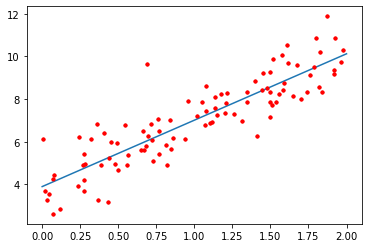

In [128]:
def generate_data():
    X = 2 * np.random.rand(100, 1)  
    y = 4 + 3 * X + np.random.randn(100, 1) 
    
    return X,y

def get_best_param(X, y):      
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation formula 
    
    return theta_best

def predict(X,theta): 
    return X.dot(theta)

X,y = generate_data() 
plt.plot(X,y,"r.")

theta = get_best_param(X,y) 
theta

X_to_pred = np.array([[0],[2]]) 
X_new_b = np.c_[np.ones((2, 1)), X_to_pred] 
predict= predict(X_new_b,theta)

plt.plot(X_to_pred, predict)
plt.plot(X,y,"r.") 
plt.show()

np.dot?